<div align="center">
   <h1>ANÁLISIS EXPLORATORIO</h1>
</div>

maybe add some svd pca

top 20 words in description(karen)

top 20 bigrams in descriptiom (karen)



In [20]:
#IMPORTS

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#DATABASE CONNECTION

file_path = r"C:\Users\Sarah\Code\ProyectoABD\database\linkedindatabase.db"
conn = sqlite3.connect(file_path)

print("Opened database successfully")

Opened database successfully


In [4]:
#postings
df_postings = pd.read_sql('SELECT * FROM postings', conn)

#companies
df_companies = pd.read_sql('SELECT * FROM companies', conn)

#industries
df_industries = pd.read_sql('SELECT * FROM industries', conn)

#job industries
df_job_industries = pd.read_sql('SELECT * FROM job_industries', conn)

#skills
df_skills = pd.read_sql('SELECT * FROM skills', conn)

#job skills
df_job_skills = pd.read_sql('SELECT * FROM job_skills', conn)

## Compañías

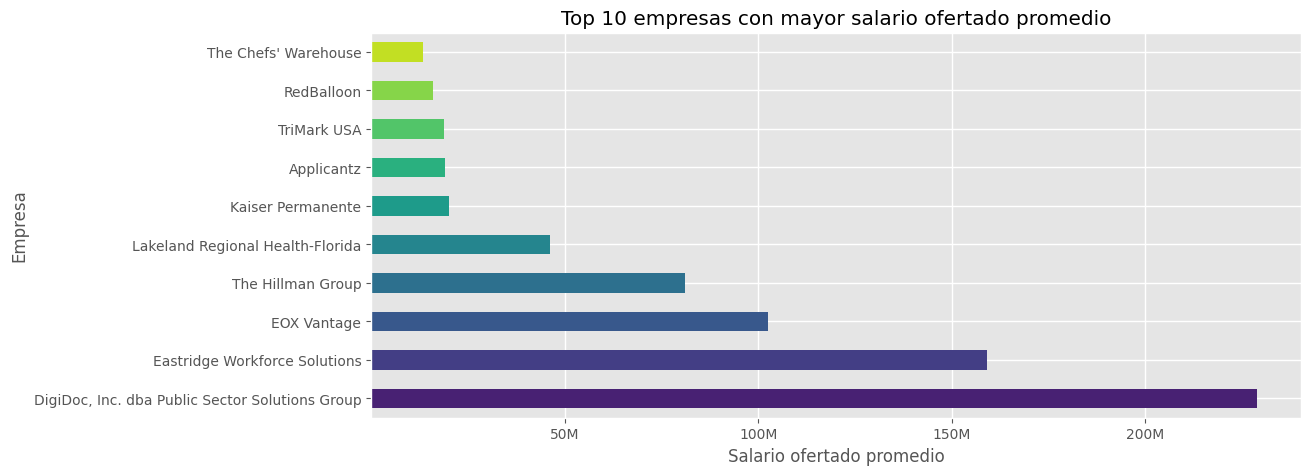

In [39]:
#top 10 companies with higher average salary
top_companies = df_postings.groupby('company_name')['normalized_salary'].apply(lambda x: np.mean(x)).nlargest(10)

# Define base colors (can be any color scheme)
base_colors = sns.color_palette('viridis', 10)

plt.figure(figsize=(12,5))
top_companies.plot(kind='barh', color=base_colors)
plt.xticks(ticks=np.arange(50000000, 240000000, 50000000), labels=[f'{int(i/1000000):,}M' for i in np.arange(50000000, 240000000, 50000000)])
plt.title('Top 10 empresas con mayor salario ofertado promedio')
plt.xlabel('Salario ofertado promedio')
plt.ylabel('Empresa')
plt.show()

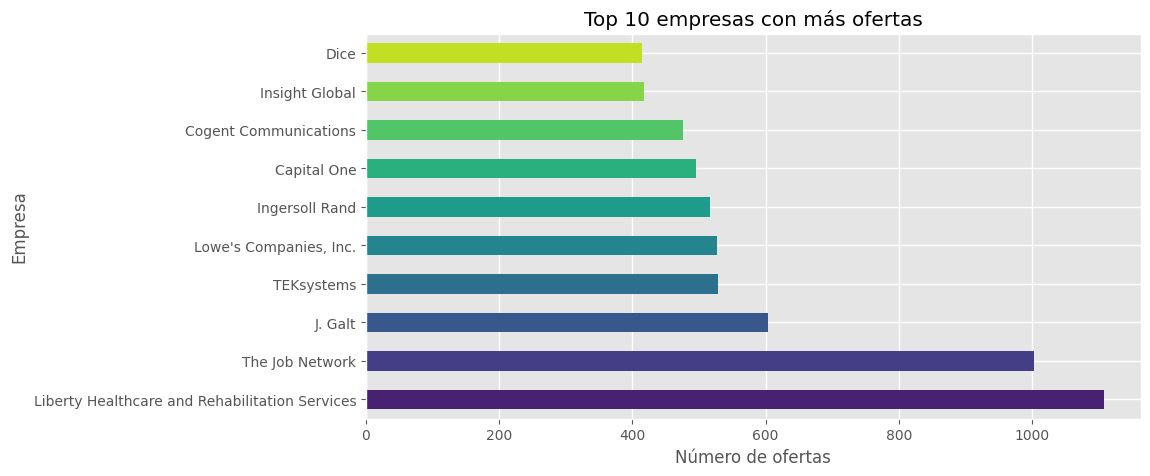

In [48]:
#top 10 companies with more job postings

top_companies_postings = df_postings['company_name'].value_counts().head(10)

# Define base colors (can be any color scheme)
base_colors = sns.color_palette('viridis', 10)

plt.figure(figsize=(10,5))
top_companies_postings.plot(kind='barh', color=base_colors)
plt.title('Top 10 empresas con más ofertas')
plt.ylabel('Empresa')
plt.xlabel('Número de ofertas')

plt.show()

## Industrias

## Habilidades

In [6]:
# Close connection
conn.close()